In [1]:
#1. Load an Image & Add Salt-and-Pepper and Gaussian Noise
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    gauss = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, gauss)
    return np.clip(noisy_image, 0, 255)

# Function to add Salt-and-Pepper noise
def add_salt_pepper_noise(image, prob=0.02):
    noisy_image = image.copy()
    num_pixels = int(prob * image.size)

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, num_pixels // 2) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, num_pixels // 2) for i in image.shape]
    noisy_image[tuple(coords)] = 0

    return noisy_image

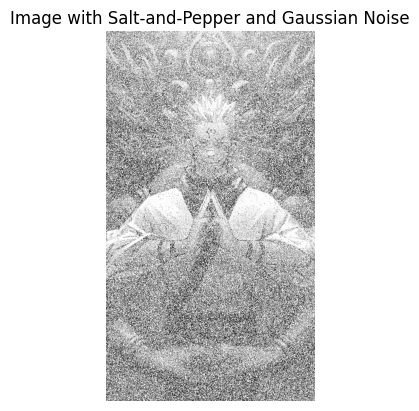

In [ ]:
# Load image
image = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)

# Apply noise
noisy_image = add_gaussian_noise(image, std=25)
noisy_image = add_salt_pepper_noise(noisy_image, prob=0.02)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Salt-and-Pepper and Gaussian Noise')
plt.axis('off')
plt.show()

3. Alpha-Trimmed Mean Filter

    Used to remove both salt-and-pepper and Gaussian noise.
    Ignores d lowest and d highest values in the neighborhood and takes the mean of the remaining.

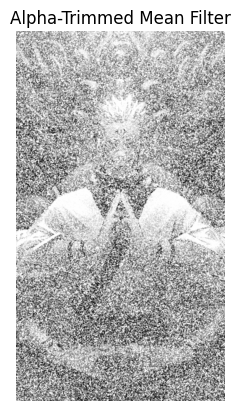

In [3]:
#2. Apply Alpha-Trimmed Mean Filter
from scipy.ndimage import generic_filter

# Alpha-Trimmed Mean Filter function
def alpha_trimmed_mean_filter(image, size=3, d=2):
    def alpha_trimmed(values):
        sorted_values = np.sort(values)
        trimmed_values = sorted_values[d:-d]  # Remove d smallest & largest
        return np.mean(trimmed_values)

    return generic_filter(image, alpha_trimmed, size=(size, size))

# Apply filter
alpha_trimmed_filtered = alpha_trimmed_mean_filter(noisy_image, size=3, d=2)

# Display the result
plt.imshow(alpha_trimmed_filtered, cmap='gray')
plt.title('Alpha-Trimmed Mean Filter')
plt.axis('off')
plt.show()


4. Adaptive Filters

These filters adjust their behavior based on local image characteristics.
Adaptive Local Variance Filter

    Reduces noise by considering the local variance in the image.
    If the local variance is high, it applies less smoothing; if low, it applies more smoothing.

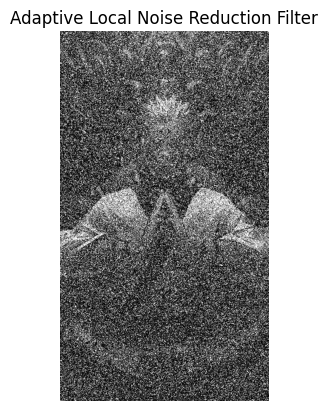

In [4]:
#3. Adaptive Local Noise Reduction Filter
def adaptive_local_noise_reduction(image, size=3, noise_var=100):
    mean_local = cv2.blur(image, (size, size))
    variance_local = cv2.blur(image**2, (size, size)) - mean_local**2
    variance_local = np.maximum(variance_local, 1e-9)  # Avoid division by zero

    filtered_image = image - (noise_var / variance_local) * (image - mean_local)
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Apply filter
adaptive_filtered = adaptive_local_noise_reduction(noisy_image, size=3, noise_var=100)

# Display the result
plt.imshow(adaptive_filtered, cmap='gray')
plt.title('Adaptive Local Noise Reduction Filter')
plt.axis('off')
plt.show()


Adaptive Median Filter

    Removes salt-and-pepper noise by considering the local neighborhood and adaptively adjusting.
    If the median filter fails due to excessive noise, the window size increases dynamically.

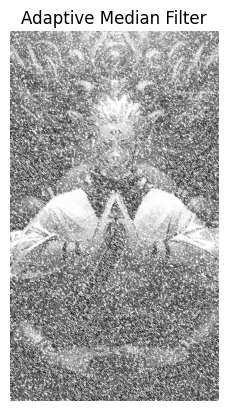

In [5]:
#4. Implement Adaptive Median Filter
def adaptive_median_filter(image, max_window_size=7):
    padded_image = np.pad(image, max_window_size//2, mode='edge')
    filtered_image = np.zeros_like(image)

    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            window_size = 3  # Start with 3x3 window
            while window_size <= max_window_size:
                r_min = max(i, window_size//2)
                r_max = min(i + window_size//2 + 1, rows)
                c_min = max(j, window_size//2)
                c_max = min(j + window_size//2 + 1, cols)

                sub_image = padded_image[r_min:r_max, c_min:c_max]
                min_val = np.min(sub_image)
                max_val = np.max(sub_image)
                med_val = np.median(sub_image)
                pixel_val = image[i, j]

                if min_val < med_val < max_val:
                    if min_val < pixel_val < max_val:
                        filtered_image[i, j] = pixel_val
                    else:
                        filtered_image[i, j] = med_val
                    break
                else:
                    window_size += 2  # Increase window size
            else:
                filtered_image[i, j] = med_val  # If max window size reached

    return filtered_image

# Apply filter
adaptive_median_filtered = adaptive_median_filter(noisy_image, max_window_size=7)

# Display the result
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title('Adaptive Median Filter')
plt.axis('off')
plt.show()
